In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler



In [3]:
df=pd.read_csv("master_dataset_again.csv")

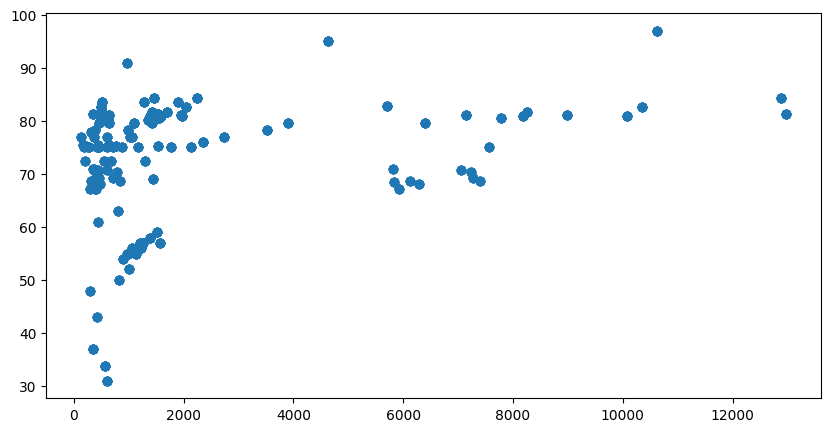

In [7]:
c=['Pakistan','India','China','Afghanistan']
country=df[df['Country'].isin(c)]
plt.figure(figsize=(10,5))
plt.scatter(country['GDP per capita (current US$)'],country['Literacy rate, adult total (% of people ages 15 and above)'])

In [9]:
from sklearn.cluster import KMeans

In [42]:
country2=df[['Life expectancy at birth, total (years)',
            'Literacy rate, adult total (% of people ages 15 and above)',
            'Renewable energy consumption', 'GDP per capita (current US$)',
            'Annual CO₂ emissions (per capita)',
            'Child mortality rate of children aged under five years, per 100 live births',"OBS_VALUE:Observation Value"]].copy()

In [43]:
country2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34017 entries, 0 to 34016
Data columns (total 7 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Life expectancy at birth, total (years)                                      34017 non-null  float64
 1   Literacy rate, adult total (% of people ages 15 and above)                   34017 non-null  float64
 2   Renewable energy consumption                                                 34017 non-null  float64
 3   GDP per capita (current US$)                                                 34017 non-null  float64
 4   Annual CO₂ emissions (per capita)                                            34017 non-null  float64
 5   Child mortality rate of children aged under five years, per 100 live births  34017 non-null  float64
 6   OBS_VALUE:Observation Value            

In [17]:
country=df[['GDP per capita (current US$)','Literacy rate, adult total (% of people ages 15 and above)']].copy()

In [18]:
country.head()

,GDP per capita (current US$),"Literacy rate, adult total (% of people ages 15 and above)"
0,196.763143,68.087554
1,354.406246,75.010407
2,313.886662,74.992372
3,685.685748,79.603410
4,697.142680,80.522965


In [9]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(country)
    wcss.append(km.inertia_)

In [14]:
wcss

[9812832023545.168,
 2821513543489.6963,
 1529737083127.699,
 753285517664.6085,
 533162311443.8551,
 364865636451.214,
 278855521784.01526,
 199300768675.18268,
 161193190667.14984,
 125090463039.62222]

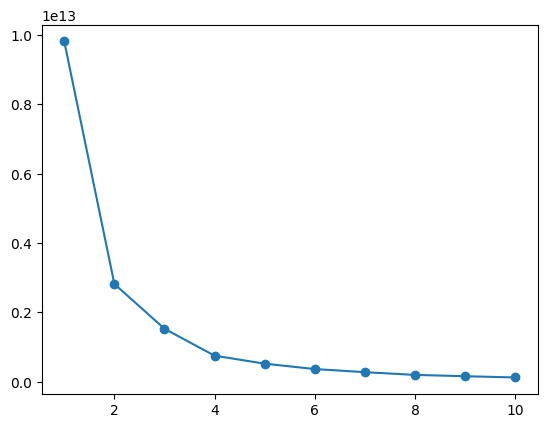

In [10]:
plt.plot(range(1,11),wcss,marker='o')

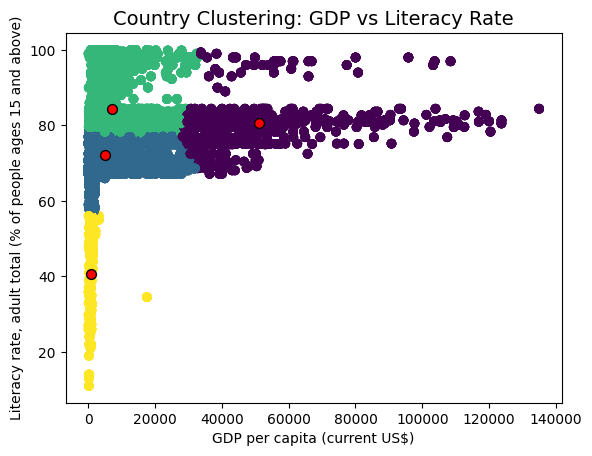

Cluster sizes:
cluster
0     3802
1    14685
2    14743
3      787
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

kmeans.fit(X_scaled)
country['cluster'] = kmeans.labels_
plt.scatter(country['GDP per capita (current US$)'],country['Literacy rate, adult total (% of people ages 15 and above)'] , c=kmeans.labels_)
centers = scaler.inverse_transform(kmeans.cluster_centers_)  
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', marker='o', s=50, edgecolor='black', label='Centroids')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Literacy rate, adult total (% of people ages 15 and above)')
plt.title('Country Clustering: GDP vs Literacy Rate', fontsize=14)
plt.show()

print("Cluster sizes:")
print(country['cluster'].value_counts().sort_index())

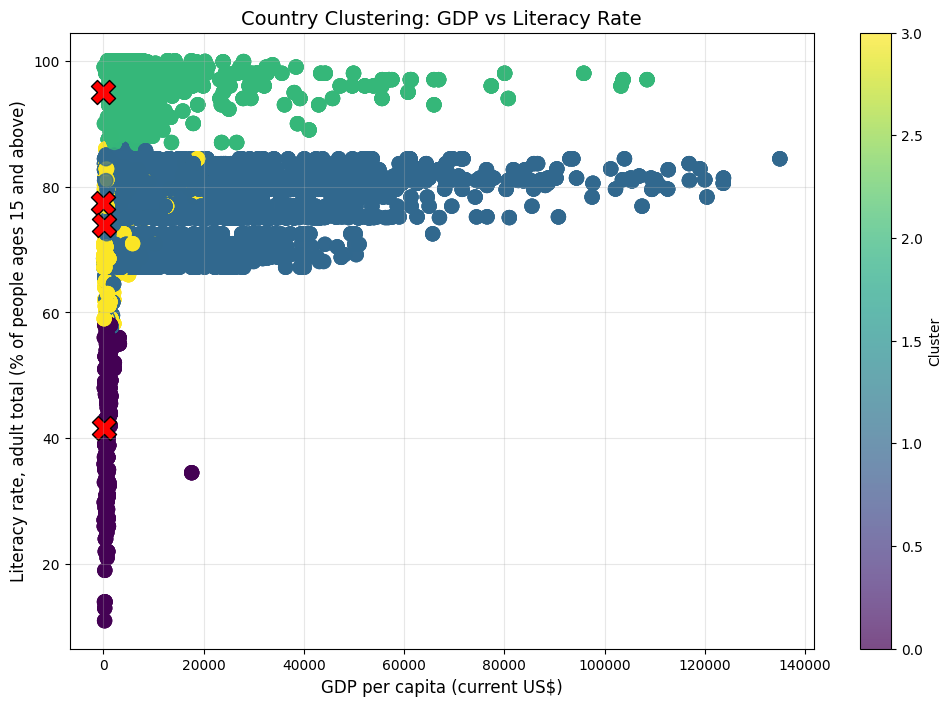

Cluster sizes:
cluster
0      841
1    23895
2     3446
3     5835
Name: count, dtype: int64


In [ ]:

from sklearn.preprocessing import StandardScaler


X = country[['GDP per capita (current US$)', 
             'Literacy rate, adult total (% of people ages 15 and above)']].copy()

# Scale the data (VERY IMPORTANT)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels back to original dataframe for analysis
country['cluster'] = kmeans.labels_

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(country['GDP per capita (current US$)'], 
                     country['Literacy rate, adult total (% of people ages 15 and above)'], 
                     c=country['cluster'], 
                     cmap='viridis', 
                     alpha=0.7,
                     s=100)  # s controls point size
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # unscale to original units
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', marker='X', s=300, edgecolor='black', label='Centroids')
plt.xlabel('GDP per capita (current US$)', fontsize=12)
plt.ylabel('Literacy rate, adult total (% of people ages 15 and above)', fontsize=12)
plt.title('Country Clustering: GDP vs Literacy Rate', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster statistics
print("Cluster sizes:")
print(country['cluster'].value_counts().sort_index())

In [26]:
country.head(30)

,GDP per capita (current US$),"Literacy rate, adult total (% of people ages 15 and above)",cluster
0,196.763143,68.087554,1
1,354.406246,75.010407,1
2,313.886662,74.992372,1
3,685.685748,79.603410,2
4,697.142680,80.522965,2
5,697.142680,80.522965,2
6,196.763143,68.087554,1
7,354.406246,75.010407,1
8,313.886662,74.992372,1
9,685.685748,79.603410,2


In [6]:


# select only numerical columns
X = df[['GDP per capita (current US$)','Renewable energy consumption','Life expectancy at birth, total (years)','OBS_VALUE:Observation Value',
        'Annual CO₂ emissions (per capita)','Literacy rate, adult total (% of people ages 15 and above)','Child mortality rate of children aged under five years, per 100 live births']]

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

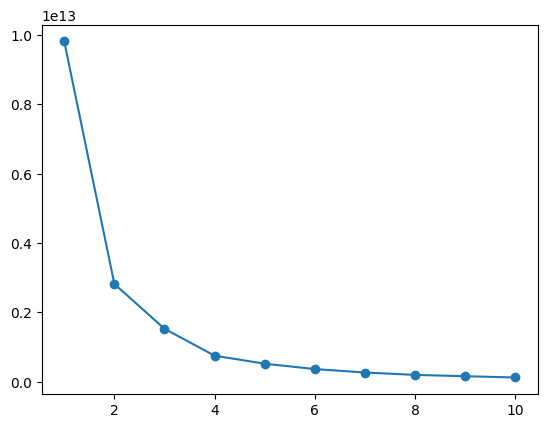

In [11]:
plt.plot(range(1,11),wcss,marker='o')

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42,n_init=20)  
df['Cluster'] = kmeans.fit_predict(X_scaled)


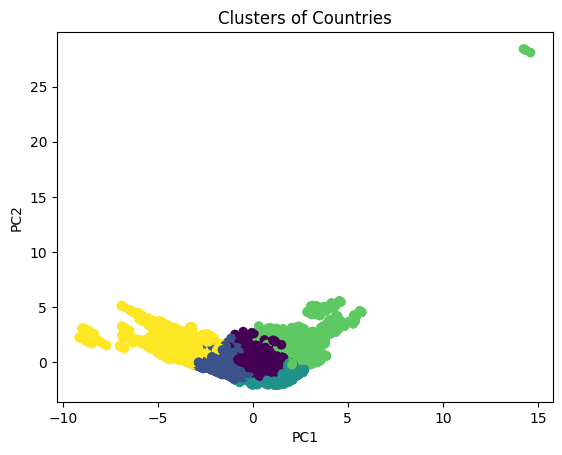

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Countries')
plt.show()


In [14]:
from sklearn.decomposition import PCA
import plotly.express as px

# Reduce to 3D with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df_pca = df.copy()
df_pca['PC1'] = X_pca[:, 0]
df_pca['PC2'] = X_pca[:, 1]
df_pca['PC3'] = X_pca[:, 2]

# Plot 3D scatter with Plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',   # Cluster column from k-means
    hover_name='Country',  # So when you hover, it shows country name
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=6, line=dict(width=0)))
fig.update_layout(title='3D PCA Clusters of Countries')
fig.show()


In [62]:
country2=df.groupby(['Year','Country'])[[ 'Life expectancy at birth, total (years)',
                    'Literacy rate, adult total (% of people ages 15 and above)',
                    'Renewable energy consumption', 'GDP per capita (current US$)',
                    'Annual CO₂ emissions (per capita)',
                    'Child mortality rate of children aged under five years, per 100 live births',"OBS_VALUE:Observation Value"
                    ]].mean().reset_index()

In [64]:
country2.head()

,Year,Country,"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)",Renewable energy consumption,GDP per capita (current US$),Annual CO₂ emissions (per capita),"Child mortality rate of children aged under five years, per 100 live births",OBS_VALUE:Observation Value
0,1990,Afghanistan,45.118,70.933682,23.0,5814.996841,0.168055,18.065842,30.0
1,1990,Albania,72.710,70.933682,25.5,617.230436,1.684179,4.077146,92.4
2,1990,Algeria,67.658,70.933682,0.2,2445.183327,3.024052,5.169863,91.2
3,1990,Angola,41.854,70.933682,72.3,965.866840,0.437789,22.270363,36.2
4,1990,Antigua and Barbuda,73.602,70.933682,0.0,7590.754424,3.836528,1.354126,96.5


In [65]:


# select only numerical columns
X = country2[['GDP per capita (current US$)','Renewable energy consumption','Life expectancy at birth, total (years)','OBS_VALUE:Observation Value',
        'Annual CO₂ emissions (per capita)','Literacy rate, adult total (% of people ages 15 and above)','Child mortality rate of children aged under five years, per 100 live births']]

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [68]:
kmeans = KMeans(n_clusters=4, random_state=42,n_init=20)  
country2['Cluster'] = kmeans.fit_predict(X_scaled)


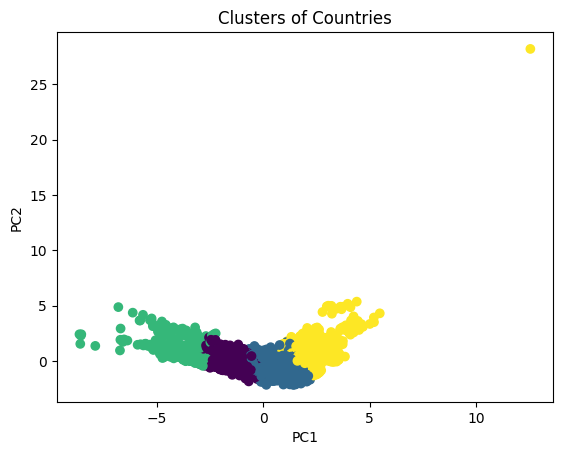

In [70]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=country2['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Countries')
plt.show()

In [71]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df_pca = country2.copy()
df_pca['PC1'] = X_pca[:, 0]
df_pca['PC2'] = X_pca[:, 1]
df_pca['PC3'] = X_pca[:, 2]

# Plot 3D scatter with Plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',   # Cluster column from k-means
    hover_name='Country',  # So when you hover, it shows country name
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=6, line=dict(width=0)))
fig.update_layout(title='3D PCA Clusters of Countries')
fig.show()


In [72]:
country2=country2[country2["Country"]=="Pakistan"]


In [73]:


# select only numerical columns
X = country2[['GDP per capita (current US$)','Renewable energy consumption','Life expectancy at birth, total (years)','OBS_VALUE:Observation Value',
        'Annual CO₂ emissions (per capita)','Literacy rate, adult total (% of people ages 15 and above)','Child mortality rate of children aged under five years, per 100 live births']]

# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [74]:
kmeans = KMeans(n_clusters=4, random_state=42,n_init=20)  
country2['Cluster'] = kmeans.fit_predict(X_scaled)


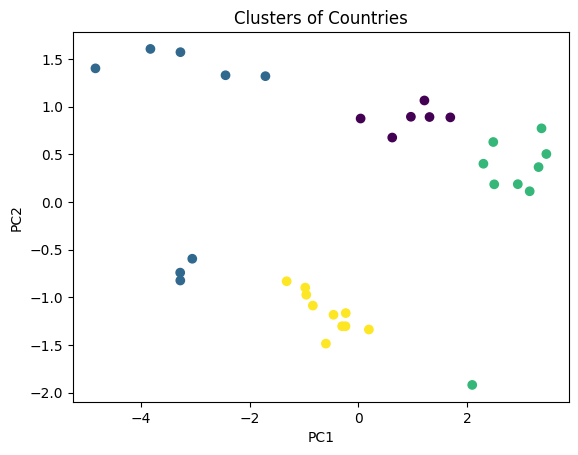

In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=country2['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Countries')
plt.show()

In [76]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df_pca = country2.copy()
df_pca['PC1'] = X_pca[:, 0]
df_pca['PC2'] = X_pca[:, 1]
df_pca['PC3'] = X_pca[:, 2]

# Plot 3D scatter with Plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',   # Cluster column from k-means
    hover_name='Country',  # So when you hover, it shows country name
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=6, line=dict(width=0)))
fig.update_layout(title='3D PCA Clusters of Countries')
fig.show()


In [52]:
result=df.groupby(['Year','Country'])[['Literacy rate, adult total (% of people ages 15 and above)','GDP per capita (current US$)'
             ]].mean().reset_index()


In [61]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        5172 non-null   int64  
 1   Country                                                     5172 non-null   object 
 2   Literacy rate, adult total (% of people ages 15 and above)  5172 non-null   float64
 3   GDP per capita (current US$)                                5172 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 161.8+ KB


In [53]:
result.head(160)

,Year,Country,"Literacy rate, adult total (% of people ages 15 and above)",GDP per capita (current US$)
0,1990,Afghanistan,70.933682,5814.996841
1,1990,Albania,70.933682,617.230436
2,1990,Algeria,70.933682,2445.183327
3,1990,Angola,70.933682,965.866840
4,1990,Antigua and Barbuda,70.933682,7590.754424
...,...,...,...,...
155,1991,Cameroon,68.559431,1014.828973
156,1991,Canada,68.559431,21846.793047
157,1991,Central African Republic,68.559431,464.828284
158,1991,Chad,68.559431,302.487268


In [60]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        5172 non-null   int64  
 1   Country                                                     5172 non-null   object 
 2   Literacy rate, adult total (% of people ages 15 and above)  5172 non-null   float64
 3   GDP per capita (current US$)                                5172 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 161.8+ KB


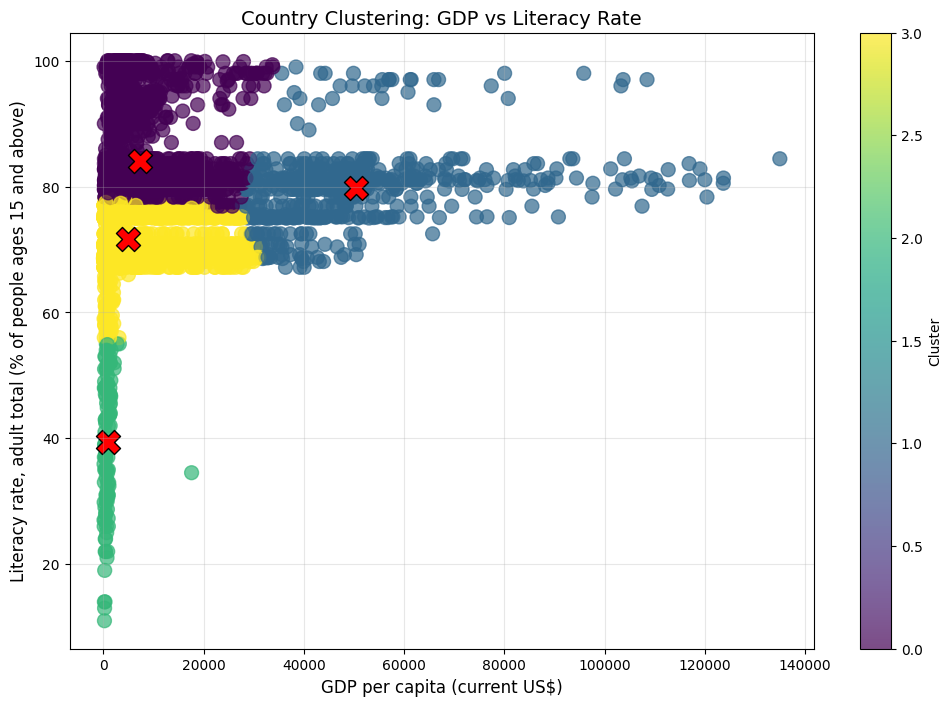

Cluster sizes:
cluster
0    2000
1     582
2     113
3    2477
Name: count, dtype: int64


In [30]:

from sklearn.preprocessing import StandardScaler


X = result[['GDP per capita (current US$)', 
             'Literacy rate, adult total (% of people ages 15 and above)']].copy()

# Scale the data (VERY IMPORTANT)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels back to original dataframe for analysis
result['cluster'] = kmeans.labels_

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(result['GDP per capita (current US$)'], 
                     result['Literacy rate, adult total (% of people ages 15 and above)'], 
                     c=result['cluster'], 
                     cmap='viridis', 
                     alpha=0.7,
                     s=100)  # s controls point size
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # unscale to original units
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', marker='X', s=300, edgecolor='black', label='Centroids')
plt.xlabel('GDP per capita (current US$)', fontsize=12)
plt.ylabel('Literacy rate, adult total (% of people ages 15 and above)', fontsize=12)
plt.title('Country Clustering: GDP vs Literacy Rate', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster statistics
print("Cluster sizes:")
print(result['cluster'].value_counts().sort_index())

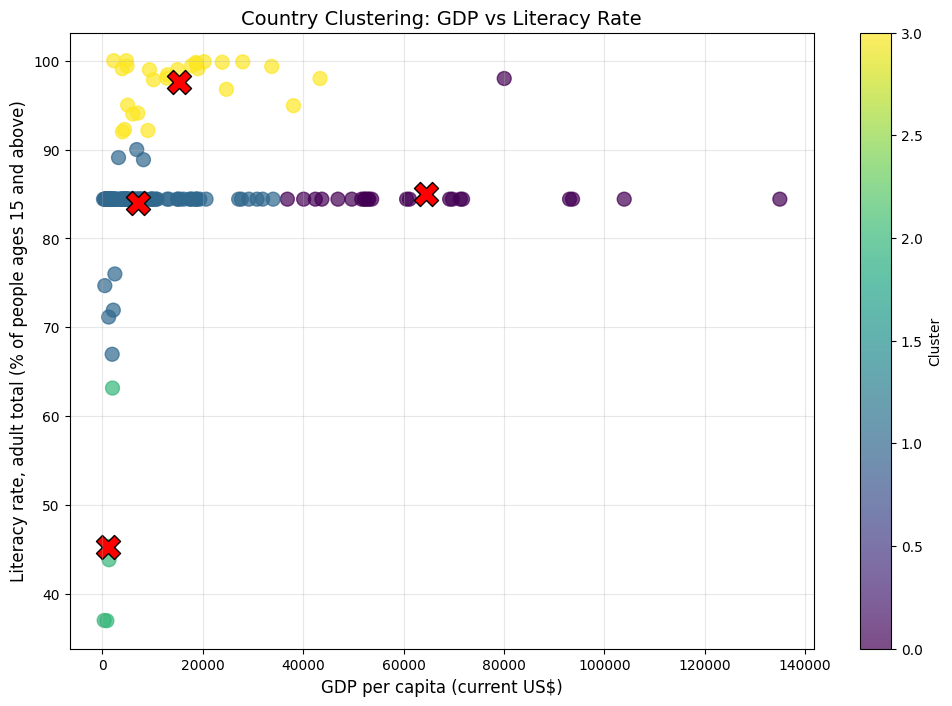

Cluster sizes:
cluster
0     23
1    106
2      5
3     26
Name: count, dtype: int64


In [32]:

from sklearn.preprocessing import StandardScaler

result=result[result["Year"] == 2021]
X = result[['GDP per capita (current US$)', 
             'Literacy rate, adult total (% of people ages 15 and above)']].copy()

# Scale the data (VERY IMPORTANT)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels back to original dataframe for analysis
result['cluster'] = kmeans.labels_

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(result['GDP per capita (current US$)'], 
                     result['Literacy rate, adult total (% of people ages 15 and above)'], 
                     c=result['cluster'], 
                     cmap='viridis', 
                     alpha=0.7,
                     s=100)  # s controls point size
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # unscale to original units
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', marker='X', s=300, edgecolor='black', label='Centroids')
plt.xlabel('GDP per capita (current US$)', fontsize=12)
plt.ylabel('Literacy rate, adult total (% of people ages 15 and above)', fontsize=12)
plt.title('Country Clustering: GDP vs Literacy Rate', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster statistics
print("Cluster sizes:")
print(result['cluster'].value_counts().sort_index())

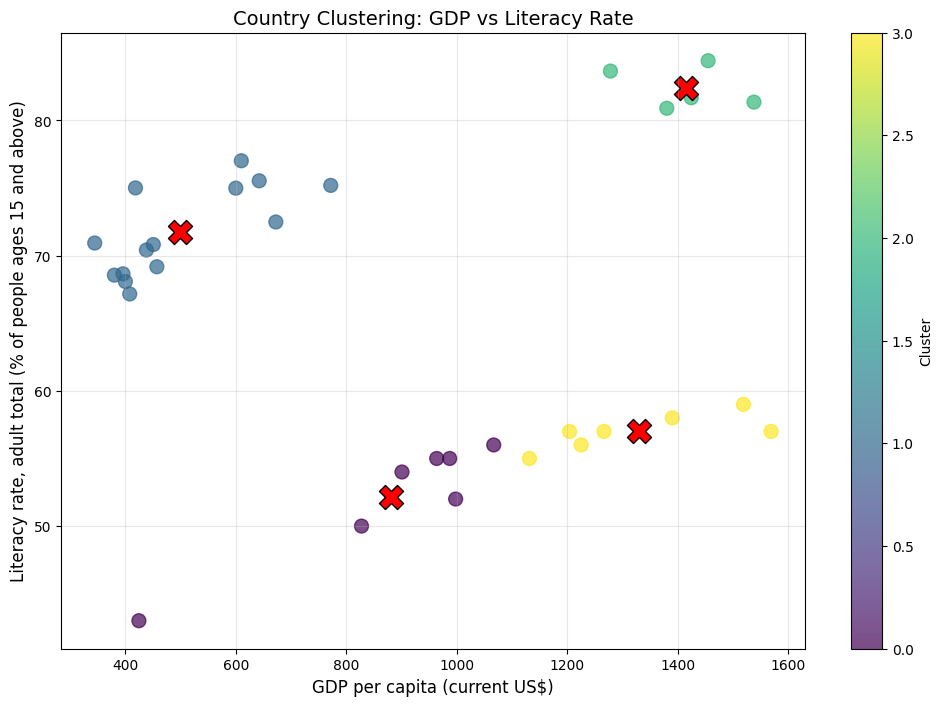

Cluster sizes:
cluster
0     7
1    14
2     5
3     7
Name: count, dtype: int64


In [39]:

from sklearn.preprocessing import StandardScaler

result=result[result["Country"] == 'Pakistan']
X = result[['GDP per capita (current US$)', 
             'Literacy rate, adult total (% of people ages 15 and above)']].copy()

# Scale the data (VERY IMPORTANT)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels back to original dataframe for analysis
result['cluster'] = kmeans.labels_

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(result['GDP per capita (current US$)'], 
                     result['Literacy rate, adult total (% of people ages 15 and above)'], 
                     c=result['cluster'], 
                     cmap='viridis', 
                     alpha=0.7,
                     s=100)  # s controls point size
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # unscale to original units
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', marker='X', s=300, edgecolor='black', label='Centroids')
plt.xlabel('GDP per capita (current US$)', fontsize=12)
plt.ylabel('Literacy rate, adult total (% of people ages 15 and above)', fontsize=12)
plt.title('Country Clustering: GDP vs Literacy Rate', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster statistics
print("Cluster sizes:")
print(result['cluster'].value_counts().sort_index())